In [3]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("train_v9rqX0R.csv")

# Display the first few rows and summary of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(None,
   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
 0           FDA15         9.30          Low Fat         0.016047   
 1           DRC01         5.92          Regular         0.019278   
 2           FDN15        17.50          Low Fat         0.016760   
 3           FDX07        19.20          Regular         0.000000   
 4           NCD19         8.93          Low Fat         0.000000   
 
                Item_Type  Item_MRP Outlet_Identifier  \
 0                  Dairy  249.8092            OUT049   
 1            Soft Drinks   48.2692            OUT018   
 2                   Meat  141.6180            OUT049   
 3  Fruits and Vegetables  182.0950            OUT010   
 4              Household   53.8614            OUT013   
 
    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
 0                       1999      Medium               Tier 1   
 1                       2009      Medium               Tier 3   
 2                       1999      

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Preprocessing
# Handle missing values in Item_Weight and Outlet_Size
imputer = SimpleImputer(strategy='mean')
data['Item_Weight'] = imputer.fit_transform(data[['Item_Weight']])
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Features and target variable
X = data.drop(columns=['Item_Identifier', 'Item_Outlet_Sales'])
y = data['Item_Outlet_Sales']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1168171.2350486591
R-squared: 0.5702045252828054


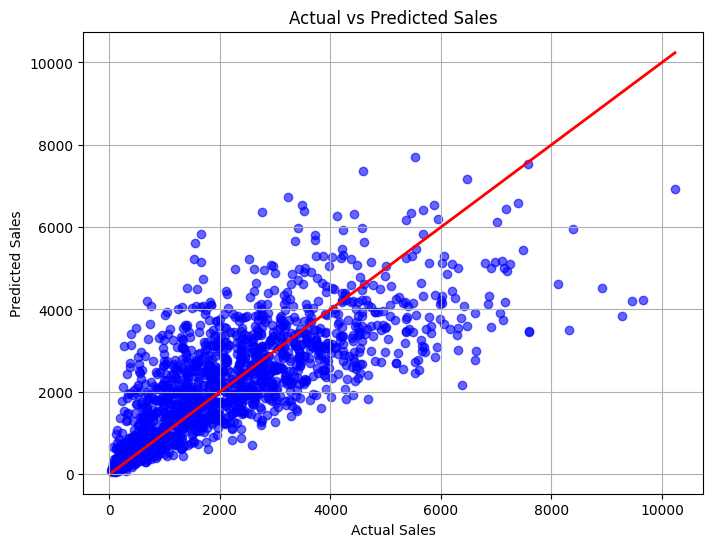

In [6]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted sales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45-degree reference line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()